In [2]:
#importing the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the csv file
df=pd.read_csv("outputd1003.csv")

In [3]:
print(df)

          Date      Time  average insect count   Class  \
0   2023-05-04  18:00:00              1.634568  OSMACO   
1   2023-05-04  18:10:00              1.306122  OSMACO   
2   2023-05-04  11:30:00              1.375000  OSMACO   
3   2023-05-04  12:20:00              1.666667  OSMACO   
4   2023-05-04  12:30:00              1.580822  OSMACO   
..         ...       ...                   ...     ...   
77  2023-05-05  10:40:00              3.035635  OSMACO   
78  2023-05-05  10:30:00              2.657210  OSMACO   
79  2023-05-05  10:20:00              2.421836  OSMACO   
80  2023-05-05  11:30:00              3.487342  OSMACO   
81  2023-05-05  11:10:00              2.743929  OSMACO   

    Dew Point, *C, WEASN17 Osmia 2023  Gust Speed, m/s, WEASN17 Osmia 2023  \
0                              10.915                                 0.50   
1                              11.291                                 0.05   
2                              10.475                                

In [4]:
df.describe()

,average insect count,"Dew Point, *C, WEASN17 Osmia 2023","Gust Speed, m/s, WEASN17 Osmia 2023","RH, %, WEASN17 Osmia 2023 Air humidity","Temperature, *C, WEASN17 Osmia 2023 AIr temperature","Solar Radiation, W/m^2, WEASN17 Osmia 2023 Radiation"
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,2.086063,12.848451,0.739024,68.460122,19.299659,284.325610
std,0.676225,1.811666,0.771923,17.565061,3.001729,258.033056
min,1.026316,9.935000,0.000000,44.550000,13.804000,1.000000
25%,1.570010,10.633000,0.100000,52.500000,17.327000,55.225000
50%,2.014663,13.543500,0.450000,65.445000,20.472500,226.150000
75%,2.553107,14.164750,1.287500,83.552500,21.442250,412.000000
max,4.105708,16.166000,3.350000,96.910000,22.781000,927.200000


In [5]:
X=df.iloc[:,4:9] #environmental features attributes


y=df.iloc[:, 2].values   #average insect count

In [6]:
#Preparing the data for the training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(65, 5) (17, 5) (65,) (17,)


In [8]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [9]:
regressor = RandomForestRegressor(n_estimators = 20,random_state=0 )
ll_rf=regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

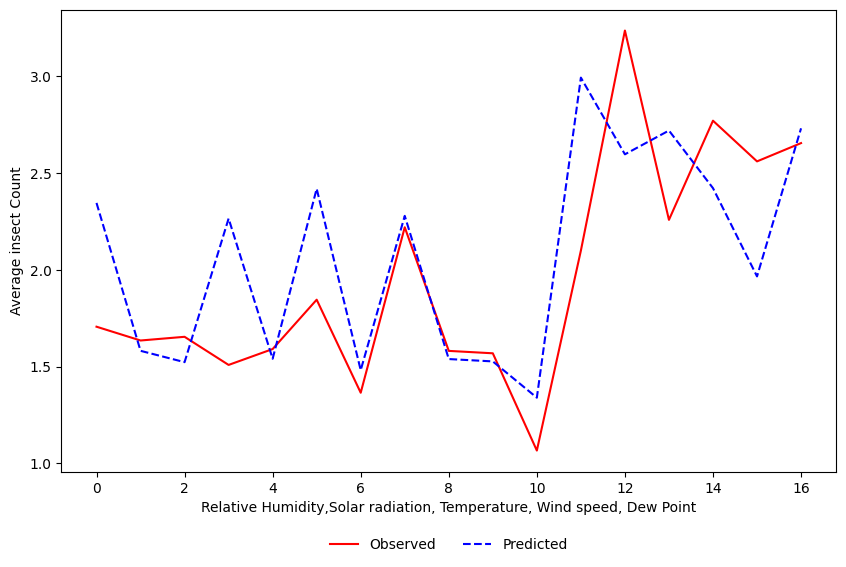

In [10]:
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label="Observed", color="red", linestyle='-')
plt.plot(x_ax, y_pred, label="Predicted", color="blue", linestyle='--')

plt.ylabel('Average insect Count')
plt.xlabel('Relative Humidity,Solar radiation, Temperature, Wind speed, Dew Point')

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)
plt.show()


c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


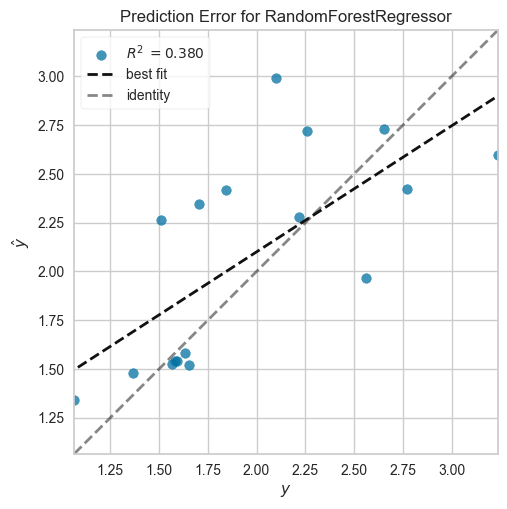

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [11]:
from yellowbrick.regressor import PredictionError

visualizer=PredictionError(ll_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()


c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


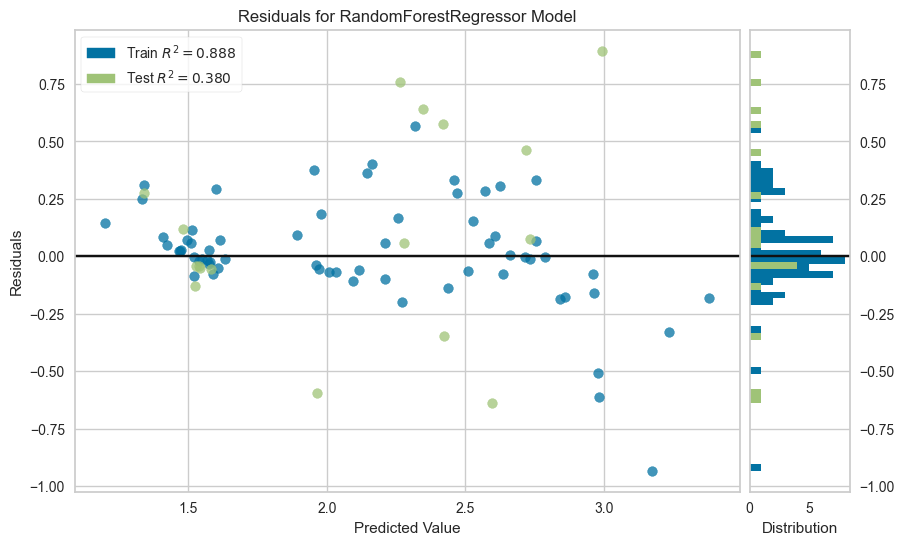

In [12]:
from matplotlib import pyplot as plt
from yellowbrick.regressor import residuals_plot

plt.rcParams['figure.figsize'] = (10, 6)

# Your code for model training and prediction

 #Plotting the residuals
residuals_plot(regressor, X_train, y_train, X_test, y_test)

plt.show()


In [13]:
from sklearn.metrics import r2_score

# Assuming you have already trained the Random Forest Regressor model
y_train_pred = regressor.predict(X_train)  # Replace rf_regressor with your trained model variable

# Calculate the R2 score for the training dataset
r2_train = r2_score(y_train, y_train_pred)  # Replace y_train with your actual target values for the training dataset

print("R2 Score (Training):", r2_train*100 ,"%")


R2 Score (Training): 88.7918651469825 %
